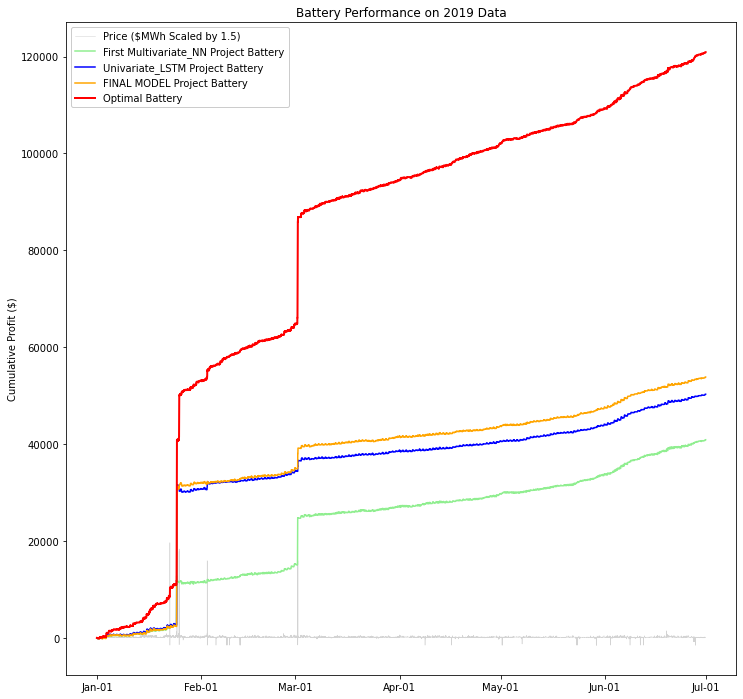

In [51]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
from datetime import datetime

start = 17150
finish = 17220

fig, ax = plt.subplots(figsize=(12, 12))

multivariateNN = pd.read_csv('FINAL_RESULTS_DATA/multivariateNN_report_results.csv', parse_dates=['SETTLEMENTDATE'])
#multivariateNN = multivariateNN.iloc[start:finish]

final_model = pd.read_csv('FINAL_RESULTS_DATA/final_model_report_results.csv', parse_dates=['SETTLEMENTDATE'])
#final_model = final_model.iloc[start:finish]

univariateLSTM = pd.read_csv('FINAL_RESULTS_DATA/univariateLSTM_report_results.csv', parse_dates=['SETTLEMENTDATE'])
#univariateLSTM = univariateLSTM.iloc[start:finish]


xaxis = "SETTLEMENTDATE"#final_model.index#

# Scales the prices to make it noticeable in plot
multivariateNN["RRP5MIN"] = (multivariateNN["RRP5MIN"]*12*1.5)

ax.plot(xaxis, "RRP5MIN", data=multivariateNN, color="lightgrey", linewidth=0.5, label="Price ($MWh Scaled by 1.5)")

# Project Battery multivariateNN
ax.plot(xaxis,'ACTUALPROFIT',data=multivariateNN, color="lightgreen", label="First Multivariate_NN Project Battery")

# Project Battery univariateLSTM
ax.plot(xaxis,'ACTUALPROFIT',data=univariateLSTM, color="blue", label="Univariate_LSTM Project Battery")

# Project Battery final_model
ax.plot(xaxis,'ACTUALPROFIT',data=final_model, color="orange", label="FINAL MODEL Project Battery")

# Optimal Battery
ax.plot(xaxis,'OPTIMALPROFIT',data=multivariateNN, linewidth=2, color="red", label="Optimal Battery")

ax.legend(framealpha=1, frameon=True)
title = "Battery Performance on 2019 Data"
plt.title(title)
plt.xlabel("")
plt.ylabel("Cumulative Profit ($)")

date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)

#plt.savefig('FINAL_RESULTS_GRAPH.png')
plt.show()